# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

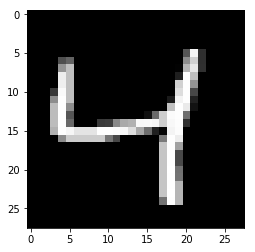

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
import tensorflow.contrib.keras as keras

keras.layers.Dense?
tf.reduce_mean?
tf.train.AdamOptimizer?
tf.sigmoid?
keras.activations.sigmoid?

In [5]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

flatten_dim = 784

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, flatten_dim), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, flatten_dim), name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)
# keras.layers.Dense(encoding_dim, activation='relu')

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, flatten_dim, activation=None)
#keras.layers.Dense(flatten_dim, activation=None)

# Sigmoid output from logits
decoded = tf.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)

# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [6]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [7]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6931
Epoch: 1/20... Training loss: 0.6901
Epoch: 1/20... Training loss: 0.6870
Epoch: 1/20... Training loss: 0.6834
Epoch: 1/20... Training loss: 0.6788
Epoch: 1/20... Training loss: 0.6727
Epoch: 1/20... Training loss: 0.6656
Epoch: 1/20... Training loss: 0.6570
Epoch: 1/20... Training loss: 0.6469
Epoch: 1/20... Training loss: 0.6352
Epoch: 1/20... Training loss: 0.6237
Epoch: 1/20... Training loss: 0.6086
Epoch: 1/20... Training loss: 0.5940
Epoch: 1/20... Training loss: 0.5753
Epoch: 1/20... Training loss: 0.5581
Epoch: 1/20... Training loss: 0.5420
Epoch: 1/20... Training loss: 0.5247
Epoch: 1/20... Training loss: 0.5069
Epoch: 1/20... Training loss: 0.4890
Epoch: 1/20... Training loss: 0.4693
Epoch: 1/20... Training loss: 0.4494
Epoch: 1/20... Training loss: 0.4388
Epoch: 1/20... Training loss: 0.4160
Epoch: 1/20... Training loss: 0.4023
Epoch: 1/20... Training loss: 0.3869
Epoch: 1/20... Training loss: 0.3757
Epoch: 1/20... Training loss: 0.3653
E

Epoch: 1/20... Training loss: 0.1966
Epoch: 1/20... Training loss: 0.1937
Epoch: 1/20... Training loss: 0.1948
Epoch: 1/20... Training loss: 0.1947
Epoch: 1/20... Training loss: 0.1937
Epoch: 1/20... Training loss: 0.1885
Epoch: 1/20... Training loss: 0.1903
Epoch: 1/20... Training loss: 0.1953
Epoch: 1/20... Training loss: 0.1895
Epoch: 1/20... Training loss: 0.1947
Epoch: 1/20... Training loss: 0.1907
Epoch: 1/20... Training loss: 0.1885
Epoch: 1/20... Training loss: 0.1914
Epoch: 1/20... Training loss: 0.1929
Epoch: 1/20... Training loss: 0.1876
Epoch: 1/20... Training loss: 0.1877
Epoch: 1/20... Training loss: 0.1890
Epoch: 1/20... Training loss: 0.1851
Epoch: 1/20... Training loss: 0.1945
Epoch: 1/20... Training loss: 0.1907
Epoch: 1/20... Training loss: 0.1945
Epoch: 1/20... Training loss: 0.1902
Epoch: 1/20... Training loss: 0.1886
Epoch: 1/20... Training loss: 0.1848
Epoch: 1/20... Training loss: 0.1862
Epoch: 1/20... Training loss: 0.1899
Epoch: 1/20... Training loss: 0.1863
E

Epoch: 2/20... Training loss: 0.1560
Epoch: 2/20... Training loss: 0.1592
Epoch: 2/20... Training loss: 0.1578
Epoch: 2/20... Training loss: 0.1525
Epoch: 2/20... Training loss: 0.1467
Epoch: 2/20... Training loss: 0.1541
Epoch: 2/20... Training loss: 0.1486
Epoch: 2/20... Training loss: 0.1513
Epoch: 2/20... Training loss: 0.1580
Epoch: 2/20... Training loss: 0.1572
Epoch: 2/20... Training loss: 0.1497
Epoch: 2/20... Training loss: 0.1523
Epoch: 2/20... Training loss: 0.1498
Epoch: 2/20... Training loss: 0.1506
Epoch: 2/20... Training loss: 0.1535
Epoch: 2/20... Training loss: 0.1554
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1553
Epoch: 2/20... Training loss: 0.1554
Epoch: 2/20... Training loss: 0.1553
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1568
Epoch: 2/20... Training loss: 0.1489
Epoch: 2/20... Training loss: 0.1516
Epoch: 2/20... Training loss: 0.1497
Epoch: 2/20... Training loss: 0.1463
E

Epoch: 3/20... Training loss: 0.1301
Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1338
Epoch: 3/20... Training loss: 0.1346
Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1332
Epoch: 3/20... Training loss: 0.1321
Epoch: 3/20... Training loss: 0.1376
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1299
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1384
Epoch: 3/20... Training loss: 0.1338
Epoch: 3/20... Training loss: 0.1299
Epoch: 3/20... Training loss: 0.1296
Epoch: 3/20... Training loss: 0.1334
Epoch: 3/20... Training loss: 0.1323
Epoch: 3/20... Training loss: 0.1300
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1335
Epoch: 3/20... Training loss: 0.1322
Epoch: 3/20... Training loss: 0.1329
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1313
Epoch: 3/20... Training loss: 0.1279
Epoch: 3/20... Training loss: 0.1351
Epoch: 3/20... Training loss: 0.1325
E

Epoch: 4/20... Training loss: 0.1194
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1265
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1189
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1265
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1127
Epoch: 4/20... Training loss: 0.1189
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1189
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1171
E

Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1159
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1143
Epoch: 5/20... Training loss: 0.1069
Epoch: 5/20... Training loss: 0.1163
Epoch: 5/20... Training loss: 0.1141
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1159
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1174
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1150
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1164
Epoch: 5/20... Training loss: 0.1151
Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1139
E

Epoch: 6/20... Training loss: 0.1083
Epoch: 6/20... Training loss: 0.1095
Epoch: 6/20... Training loss: 0.1111
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1099
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1094
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1102
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1093
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1085
Epoch: 6/20... Training loss: 0.1097
Epoch: 6/20... Training loss: 0.1104
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1069
E

Epoch: 6/20... Training loss: 0.1008
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.0990
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1010
Epoch: 6/20... Training loss: 0.1008
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1046
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.0978
Epoch: 7/20... Training loss: 0.1052
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1082
E

Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.1050
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1065
Epoch: 7/20... Training loss: 0.0978
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1040
E

Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.1033
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.1015
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0952
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.1014
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.1015
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0979
E

Epoch: 9/20... Training loss: 0.0995
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.1018
Epoch: 9/20... Training loss: 0.0919
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.1011
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.1013
Epoch: 9/20... Training loss: 0.0991
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0921
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0987
E

Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20... Training loss: 0.0983
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.1010
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0987
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0988
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0997
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0919
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.1005
Epoch: 11/20... Training loss: 0.0985
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0916
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0998
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0982
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0982
Epoch: 12/20... Training loss: 0.0984
Epoch: 12/20... Training loss: 0.0979
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0975
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0975
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0981
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0977
Epoch: 12/20... Training loss: 0.0977
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0987
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0973
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.0886
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0906
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0989
Epoch: 13/20... Training loss: 0.0977
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0969
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.1003
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0983
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0978
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0985
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0905
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0899
Epoch: 16/20... Training loss: 0.0973
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0974
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0985
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0901
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0969
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0979
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0969
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0965
Epoch: 17/20... Training loss: 0.0968
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0974
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0968
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0965
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0968
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0976
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0994
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0969
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0980
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0971
Epoch: 20/20... Training loss: 0.0970
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

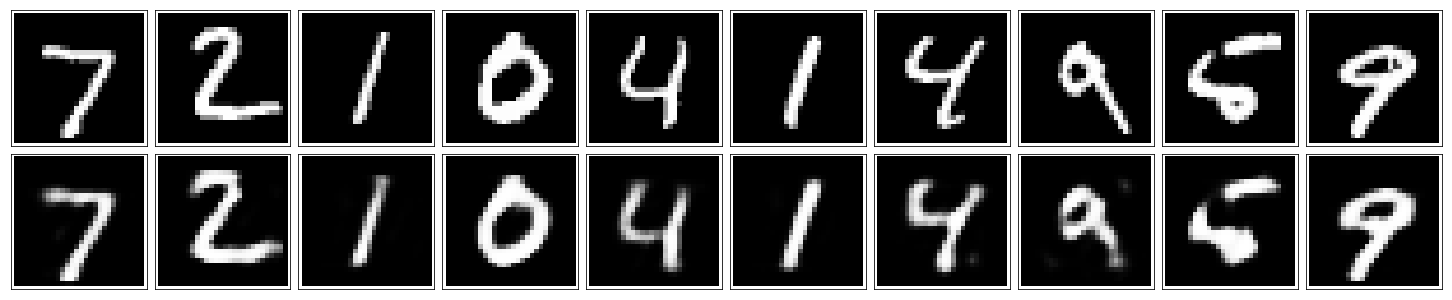

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.